# Introdução

&nbsp;&nbsp;&nbsp;&nbsp; A popularidade de uma música é um fator crucial para determinar seu sucesso comercial, influenciando desde campanhas de marketing até investimentos em artistas e álbuns. No cenário atual, plataformas de streaming como o Spotify oferecem uma vasta gama de informações sobre músicas, como características acústicas, metadados e métricas de popularidade. Com a ajuda dessas informações, é possível usar técnicas de machine learning para antecipar o sucesso de uma música antes mesmo de ela ser lançada.

&nbsp;&nbsp;&nbsp;&nbsp; Este projeto tem como objetivo construir um modelo preditivo capaz de prever a popularidade de músicas no Spotify, utilizando um conjunto de dados com mais de 100 mil músicas. A gravadora que disponibilizou os dados espera otimizar suas decisões de marketing e investimento com base nos resultados obtidos pelo modelo.

**Objetivos:**
- **Analisar** as características das músicas fornecidas, incluindo dados acústicos e metadados.
- **Explorar** correlações e padrões que possam estar associados à popularidade de uma música.
- **Desenvolver** um modelo preditivo que atenda a critérios mínimos de acurácia (70%) para prever a popularidade de uma música.
- **Ajustar** o modelo para garantir que ele atinja o melhor desempenho possível, utilizando técnicas de finetuning de hiperparâmetros.

**Estrutura do notebook:**
- **Introdução:** Apresentação do objetivo do projeto e explicação das variáveis disponíveis.
- **Limpeza dos Dados:** Remoção de duplicatas, tratamento de possíveis valores ausentes e *outliers*.
- **Análise Exploratória:** Investigação das características e correlações dos dados.
- **Formulação de Hipóteses:** Definição de hipóteses sobre os fatores que influenciam a popularidade.
- **Pré-processamento:** Transformação e escalonamento dos dados para torná-los adequados para o modelo de machine learning.
- **Treinamento do Modelo:** Treinamento e ajuste de modelos preditivos com validação cruzada.
- **Conclusão:** Resumo dos resultados, desempenho do modelo e insights obtidos.

&nbsp;&nbsp;&nbsp;&nbsp; Com isso, espera-se entregar à gravadora um modelo capaz de prever, com alta precisão, quais músicas têm o maior potencial de se tornarem virais, auxiliando na tomada de decisões estratégicas.

## Significado de Cada Coluna

- track_id: O ID único de cada música

- artists: Nome dos(as) artistas que performaram a música, separados por ';'

- album_name: Nome do álbum no qual aparece a música

- track_name: Nome da música

- duration_ms: A duração da música em milissegundos

- explicit: Boolean indicando se a música possui conteúdo explícito

- danceability: Descreve quanto uma música é "dançante" (0.0 = menos dançante, 1.0 = mais dançante)

- energy: Representa a intensidade e atividade de uma música (0.0 = baixa energia, 1.0 = alta energia)

- key: A tonalidade musical da faixa mapeada usando a notação padrão de Classe de Altura (12 notas musicais)

- loudness: Nível geral de volume da faixa em decibéis (dB)

- mode: Indica a modalidade (maior ou menor) da faixa

- speechiness: Detecta a presença de palavras faladas na faixa

- acousticness: Medida de confiança sobre se a faixa é acústica (0,0 = não acústica, 1,0 = altamente acústica)

- instrumentalness: Prediz se uma faixa contém vocais (0,0 = contém vocais, 1,0 = instrumental)

- liveness: Detecta a presença de uma audiência na gravação (0,0 = gravação em estúdio, 1,0 = performance ao vivo)

- valence: Mede a positividade musical transmitida por uma faixa (0,0 = negativa, 1,0 = positiva)

- tempo: Tempo estimado da faixa em batidas por minuto (BPM)

- time_signature: Assinatura de tempo estimada da faixa (de 3 a 7)

- track_genre: O gênero da música

- popularity_target: Boolean indicando se a música é popular ou não

## Importação das Bibliotecas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Funções

In [23]:
def display_statistics(df):
    """
    Calcula e exibe estatísticas descritivas para colunas numéricas de um DataFrame.
    
    Parâmetros:
    df (pd.DataFrame): O DataFrame para o qual as estatísticas serão calculadas.
    """
    # Calcular estatísticas
    stats = {
        'Mínimo': df.select_dtypes(include=['number']).min(),
        'Máximo': df.select_dtypes(include=['number']).max(),
        'Contagem de Valores Únicos': df.select_dtypes(include=['number']).nunique(),
        'Média': df.select_dtypes(include=['number']).mean()  # Ignora colunas não numéricas
    }

    # Criar um novo DataFrame com as estatísticas
    stats_df = pd.DataFrame(stats)

    # Ordenar o DataFrame pelas estatísticas desejadas
    sorted_stats_df = stats_df.sort_values(
        by=['Contagem de Valores Únicos', 'Máximo', 'Mínimo'],
        ascending=[True, False, True]  # Ajuste a ordem conforme necessário
    )

    # Exibir o DataFrame ordenado
    display(sorted_stats_df)

# Limpeza

## Ánalise Inicial da Estrutura 

In [24]:
df_train_cleaned = pd.read_csv("data/train.csv")

display(df_train_cleaned)
display(df_train_cleaned.info())
# Geração de estatísticas básicas (acho melhor utilizar esta função que utilizar o .describe())
display_statistics(df_train_cleaned)

track_unique_id                track_id  \
0                41996  7hUhmkALyQ8SX9mJs5XI3D   
1                76471  5x59U89ZnjZXuNAAlc8X1u   
2                54809  70Vng5jLzoJLmeLu3ayBQq   
3                16326  1cRfzLJapgtwJ61xszs37b   
4               109799  47d5lYjbiMy0EdMRV8lRou   
...                ...                     ...   
79795            76820  6mmbWSbU5FElQOocyktyUZ   
79796           110268  0XL75lllKb1jTmEamqwVU6   
79797           103694  763FEhIZGILafwlkipdgtI   
79798              860  2VVWWwQ3FiWnmbukTb6Kd3   
79799            15795  3nic2HyQ0wsLb6IUFWiWu9   

                                                 artists  \
0                                       Love and Rockets   
1                                       Filippa Giordano   
2                                          Susumu Yokota   
3                                      Franz Liszt;YUNDI   
4                                                Scooter   
...                                                  ...   
79795  Amilcare Ponchielli;Gothenburg Symphony Orches...   
79796                                            Sajanka   
79797                   Frankie Valli & The Four Seasons   
79798                                        The Mayries   
79799                                     S N U G;Dyrean   

                                              album_name  \
0                                       Love and Rockets   
1                                       Filippa Giordano   
2                                                 Symbol   
3                                   Relajación y siestas   
4                                        Scooter Forever   
...                                                  ...   
79795  Ballet Highlights - The Nutcracker, Romeo & Ju...   
79796                                      Time of India   
79797                                    Merry Christmas   
79798                                        I Will Wait   
79799                                       Rainy Nights   

                                    track_name  duration_ms  explicit  \
0                                   Motorcycle       211533     False   
1       Addio del passato - From "La traviata"       196000     False   
2                           Purple Rose Minuet       216506     False   
3                 Liebeslied (Widmung), S. 566       218346     False   
4                                 The Darkside       173160     False   
...                                        ...          ...       ...   
79795  La Gioconda / Act 3: Dance Of The Hours       162613     False   
79796                            Time of India       240062     False   
79797          I Saw Mommy Kissing Santa Claus       136306     False   
79798                              I Will Wait       216841     False   
79799                                Back Then       127200     False   

       danceability   energy  key  ...  mode  speechiness  acousticness  \
0             0.305  0.84900    9  ...     1       0.0549      0.000058   
1             0.287  0.19000    7  ...     0       0.0370      0.930000   
2             0.583  0.50900    1  ...     1       0.0362      0.777000   
3             0.163  0.03680    8  ...     1       0.0472      0.991000   
4             0.647  0.92100    2  ...     1       0.1850      0.000939   
...             ...      ...  ...  ...   ...          ...           ...   
79795         0.554  0.00763    4  ...     1       0.0502      0.915000   
79796         0.689  0.55400    9  ...     1       0.0759      0.091000   
79797         0.629  0.56000    0  ...     0       0.0523      0.595000   
79798         0.421  0.10700    6  ...     1       0.0335      0.948000   
79799         0.565  0.24000   10  ...     1       0.0439      0.931000   

       instrumentalness  liveness  valence    tempo  time_signature  \
0              0.056700    0.4640   0.3200  141.793               4   
1              0.000356    0.0834   0.1330  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

None

Mínimo       Máximo  Contagem de Valores Únicos  \
mode                   0.000000        1.000                           2   
popularity_target      0.000000        1.000                           2   
time_signature         0.000000        5.000                           5   
key                    0.000000       11.000                          12   
danceability           0.000000        0.985                        1120   
speechiness            0.000000        0.965                        1454   
liveness               0.000000        1.000                        1706   
valence                0.000000        0.995                        1737   
energy                 0.000019        1.000                        1932   
acousticness           0.000000        0.996                        4856   
instrumentalness       0.000000        1.000                        5252   
loudness             -49.307000        4.532                       17562   
tempo                  0.000000      222.605                       37292   
duration_ms        13386.000000  5237295.000                       40712   
track_unique_id        0.000000   113998.000                       79800   

                           Média  
mode                    0.637732  
popularity_target       0.487845  
time_signature          3.902556  
key                     5.307043  
danceability            0.567318  
speechiness             0.084750  
liveness                0.213313  
valence                 0.474267  
energy                  0.641529  
acousticness            0.314979  
instrumentalness        0.157319  
loudness               -8.263741  
tempo                 122.076559  
duration_ms        227902.192506  
track_unique_id     57140.494048

## Remoção de Duplicatas

&nbsp;&nbsp;&nbsp;&nbsp; Apesar de inicialmente acreditar-se que não há nenhuma linha duplicada, porque `df_train_cleaned[df_train_cleaned.duplicated()]` não retorna nada, identificou-se, pela coluna track_id, que existem músicas que se repetem mudando somente o gênero e mantendo a popularidade. Após isso, identificou-se também que existem músicas repetidas pela cluna track_name (às vezes com somente o álbum diferente).

In [25]:
# Identificar linhas duplicadas na coluna 'track_name'
df_duplicated_by_id = df_train_cleaned[df_train_cleaned.duplicated(subset='track_id', keep=False)].sort_values(by='track_id')
df_duplicated_by_name = df_train_cleaned[df_train_cleaned.duplicated(subset='track_name', keep=False)].sort_values(by='track_name')

# Exibir o DataFrame com as linhas duplicadas
print("Linhas duplicadas pela coluna track_id")
display(df_duplicated_by_id)
print("Linhas duplicadas pela coluna track_name")
display(df_duplicated_by_name)

Linhas duplicadas pela coluna track_id


track_unique_id                track_id            artists  \
37758           103211  001APMDOl3qtx1526T11n1  Pink Sweat$;Kirby   
26786            15028  001APMDOl3qtx1526T11n1  Pink Sweat$;Kirby   
39619            85578  001YQlnDSduXd5LgBd66gT        Soda Stereo   
78451           100420  001YQlnDSduXd5LgBd66gT        Soda Stereo   
58237             2106  003vvx7Niy0yvhvHt4a68B        The Killers   
...                ...                     ...                ...   
314              72679  7zv2vmZq8OjS54BxFzI2wM             Attila   
24108            22326  7zv2vmZq8OjS54BxFzI2wM             Attila   
45951            91401  7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   
1105              3100  7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   
22382             2004  7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   

                                            album_name  \
37758                                          New RnB   
26786                                          New RnB   
39619                         Soda Stereo (Remastered)   
78451                         Soda Stereo (Remastered)   
58237                                         Hot Fuss   
...                                                ...   
314                      Soundtrack to a Party (Bonus)   
24108                    Soundtrack to a Party (Bonus)   
45951  Hard To Imagine The Neighbourhood Ever Changing   
1105   Hard To Imagine The Neighbourhood Ever Changing   
22382  Hard To Imagine The Neighbourhood Ever Changing   

                                     track_name  duration_ms  explicit  \
37758                                    Better       176320     False   
26786                                    Better       176320     False   
39619  El Tiempo Es Dinero - Remasterizado 2007       177266     False   
78451  El Tiempo Es Dinero - Remasterizado 2007       177266     False   
58237                            Mr. Brightside       222973     False   
...                                         ...          ...       ...   
314                        Lets Start the Party       125859      True   
24108                      Lets Start the Party       125859      True   
45951                        You Get Me So High       153000     False   
1105                         You Get Me So High       153000     False   
22382                        You Get Me So High       153000     False   

       danceability  energy  key  ...  mode  speechiness  acousticness  \
37758         0.613   0.471    1  ...     0       0.1070      0.316000   
26786         0.613   0.471    1  ...     0       0.1070      0.316000   
39619         0.554   0.921    2  ...     1       0.0758      0.019400   
78451         0.554   0.921    2  ...     1       0.0758      0.019400   
58237         0.352   0.911    1  ...     1       0.0747      0.001210   
...             ...     ...  ...  ...   ...          ...           ...   
314           0.592   0.932    1  ...     1       0.0558      0.000005   
24108         0.592   0.932    1  ...     1       0.0558      0.000005   
45951         0.551   0.881    7  ...     0       0.0542      0.186000   
1105          0.551   0.881    7  ...     0       0.0542      0.186000   
22382         0.551   0.881    7  ...     0       0.0542      0.186000   

       instrumentalness  liveness  valence    tempo  time_signature  \
37758          0.000001    0.1170    0.406  143.064               4   
26786          0.000001    0.1170    0.406  143.064               4   
39619          0.088100    0.3290    0.700  183.571               1   
78451          0.088100    0.3290    0.700  183.571               1   
58237          0.000000    0.0995    0.236  148.033               4   
...                 ...       ...      ...      ...             ...   
314            0.859000    0.0730    0.677  133.987               4   
24108          0.859000    0.0730    0.677  133.987               4   
45951          0.079100    0.1520    0.387   88.036             

Linhas duplicadas pela coluna track_name


track_unique_id                track_id  \
27456            39446  4yfFraZrNnh2zJTok5fzq7   
53334            16385  4yfFraZrNnh2zJTok5fzq7   
16168           111315  1Ffxfl1vuEDc0xBVPIQ50s   
36378           111402  03XMXPAE2Yx6HeqCpAPL5o   
36323             4152  2Bc4llhjJBW77I552RgA3L   
...                ...                     ...   
45090            70244  4JrGpUQothsSVR6iBhR9NC   
36388            62807  5v1dhqe9vgvp87eyd27hkb   
25111            62556  1LwSnnsoKcAUv9TPFEZ7iQ   
3139             12313  0FBjsiiUFLET2xqeKVrGBE   
38875            70665  0FBjsiiUFLET2xqeKVrGBE   

                                                 artists  \
27456  Felix Mendelssohn;Christopher Herrick;Simon Pr...   
53334  Felix Mendelssohn;Christopher Herrick;Simon Pr...   
16168                                          Kid Koala   
36378                                          Kid Koala   
36323                                         Aphex Twin   
...                                                  ...   
45090                                Namewee;Leehom Wang   
36388                                               yama   
25111                                               yama   
3139                                          Eason Chan   
38875                                         Eason Chan   

                                              album_name  \
27456                         Klassische Weihnachtsmusik   
53334                         Klassische Weihnachtsmusik   
16168  "Was He Slow?" (Music From The Motion Picture ...   
36378        Baby Driver (Music from the Motion Picture)   
36323                   Selected Ambient Works Volume II   
...                                                  ...   
45090                                               亞洲通車   
36388                                the meaning of life   
25111                                                 麻痺   
3139                                     我的快樂時代 (華星40系列)   
38875                                    我的快樂時代 (華星40系列)   

                                              track_name  duration_ms  \
27456                     "Hark! The Herald Angels Sing"       141000   
53334                     "Hark! The Herald Angels Sing"       141000   
16168  "Was He Slow?" - Music From The Motion Picture...       106880   
36378  "Was He Slow?" - Music From The Motion Picture...       106880   
36323                                                 #3       464293   
...                                                  ...          ...   
45090                                               飄向北方       269181   
36388                                                 麻痺       198040   
25111                                                 麻痺       198100   
3139                                                黃金時代       248040   
38875                                               黃金時代       248040   

       explicit  danceability  energy  key  ...  mode  speechiness  \
27456     False         0.158   0.210    7  ...     1       0.0330   
53334     False         0.158   0.210    7  ...     1       0.0330   
16168     False         0.754   0.719   10  ...     0       0.3710   
36378     False         0.754   0.719   10  ...     0       0.3710   
36323     False         0.167   0.071    6  ...     0       0.0410   
...         ...           ...     ...  ...  ...   ...          ...   
45090     False         0.500   0.778    0  ...     0       0.1260   
36388     False         0.309   0.941    0  ...     0       0.0763   
25111     False         0.532   0.932    5  ...     0       0.0522   
3139      False         0.555   0.494    4  ...     1       0.0285   
38875     False         0.555   0.494    4  ...     1       0.0285   

       acousticness  instrumentalness  liveness  valence    tempo  \
27456        0.9530             0.860     0.153   0.1930   80.984   
53334        0.9530             0.860     0.153   0.1930   80.984   
16168        0.3730             0.259  

&nbsp;&nbsp;&nbsp;&nbsp; Músicas duplicadas afetarão o treinamento dos modelos. É importante remover essas linhas para garantir a verossimilidade das análises. Também será feita a remoção de track_id agora que ela foi completamente inutilizada uma vez que existe a coluna track_unique_id e track_id não está identificando nada.

In [26]:
# Remover duplicatas com base na coluna 'track_id', mantendo apenas a primeira ocorrência
df_train_cleaned = df_train_cleaned.drop_duplicates(subset='track_id', keep='first')

# Remover duplicatas com base na coluna 'track_id', mantendo apenas a primeira ocorrência
df_train_cleaned = df_train_cleaned.drop_duplicates(subset='track_name', keep='first')

# Remoção de track_id 
df_train_cleaned = df_train_cleaned.drop('track_id', axis=1)

# Impressão do novo formato do dataframe
print(df_train_cleaned.shape)

(55767, 20)


&nbsp;&nbsp;&nbsp;&nbsp; Houve a redução de 24.033 músicas duplicadas na base.

## Outliers

&nbsp;&nbsp;&nbsp;&nbsp; Antes da finalização da limpeza, é fundamental analisar se há a presença de *outliers* na base. Para isso, serão gerados 3 gráficos: *strip plot*, densidade e *boxplot*

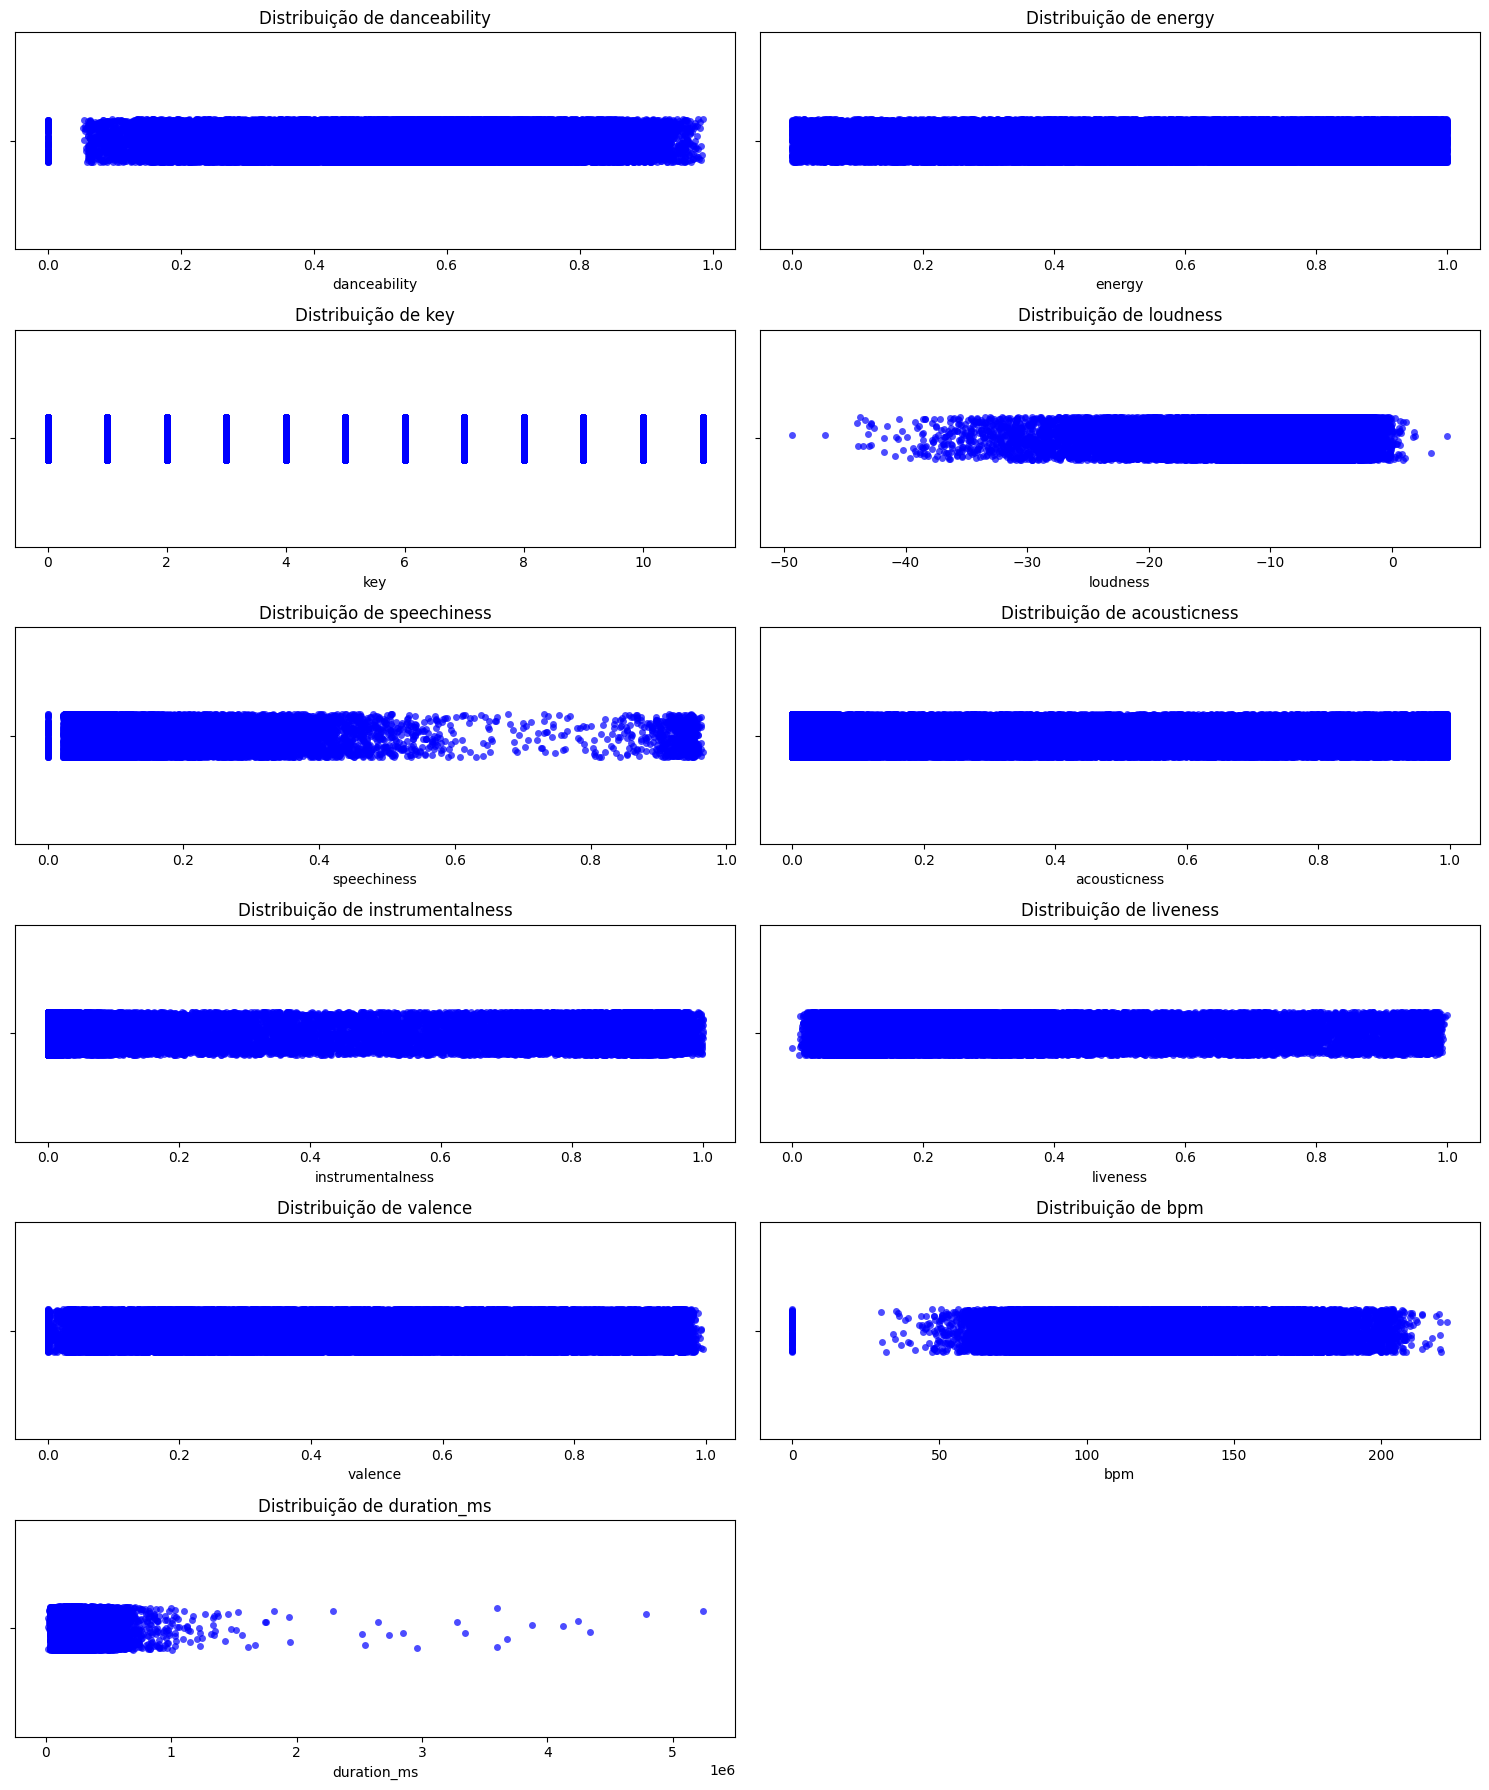

In [27]:
# Primeiro será feito a substituição do nome da coluna "tempo" para "bpm" porque, pessoalmente, considero um nome mais elucidativo
df_train_cleaned.rename(columns={'tempo': 'bpm'}, inplace=True)

# Colunas que podem haver outliers que afetam o modelo
colunas = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
           'acousticness', 'instrumentalness', 'liveness', 
           'valence', 'bpm', 'duration_ms']

# Configurando o tamanho da figura
num_colunas = len(colunas)
num_linhas = (num_colunas // 2) + (num_colunas % 2)  # Calcula o número de linhas necessárias

plt.figure(figsize=(15, num_linhas * 3))  # Ajusta a altura com base no número de linhas

# Loop para criar um gráfico de linha para cada coluna
for i, coluna in enumerate(colunas, 1):
    plt.subplot(num_linhas, 2, i)  # Subplots com o número correto de linhas e 2 colunas
    sns.stripplot(data=df_train_cleaned, x=coluna, color='blue', alpha=0.7)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

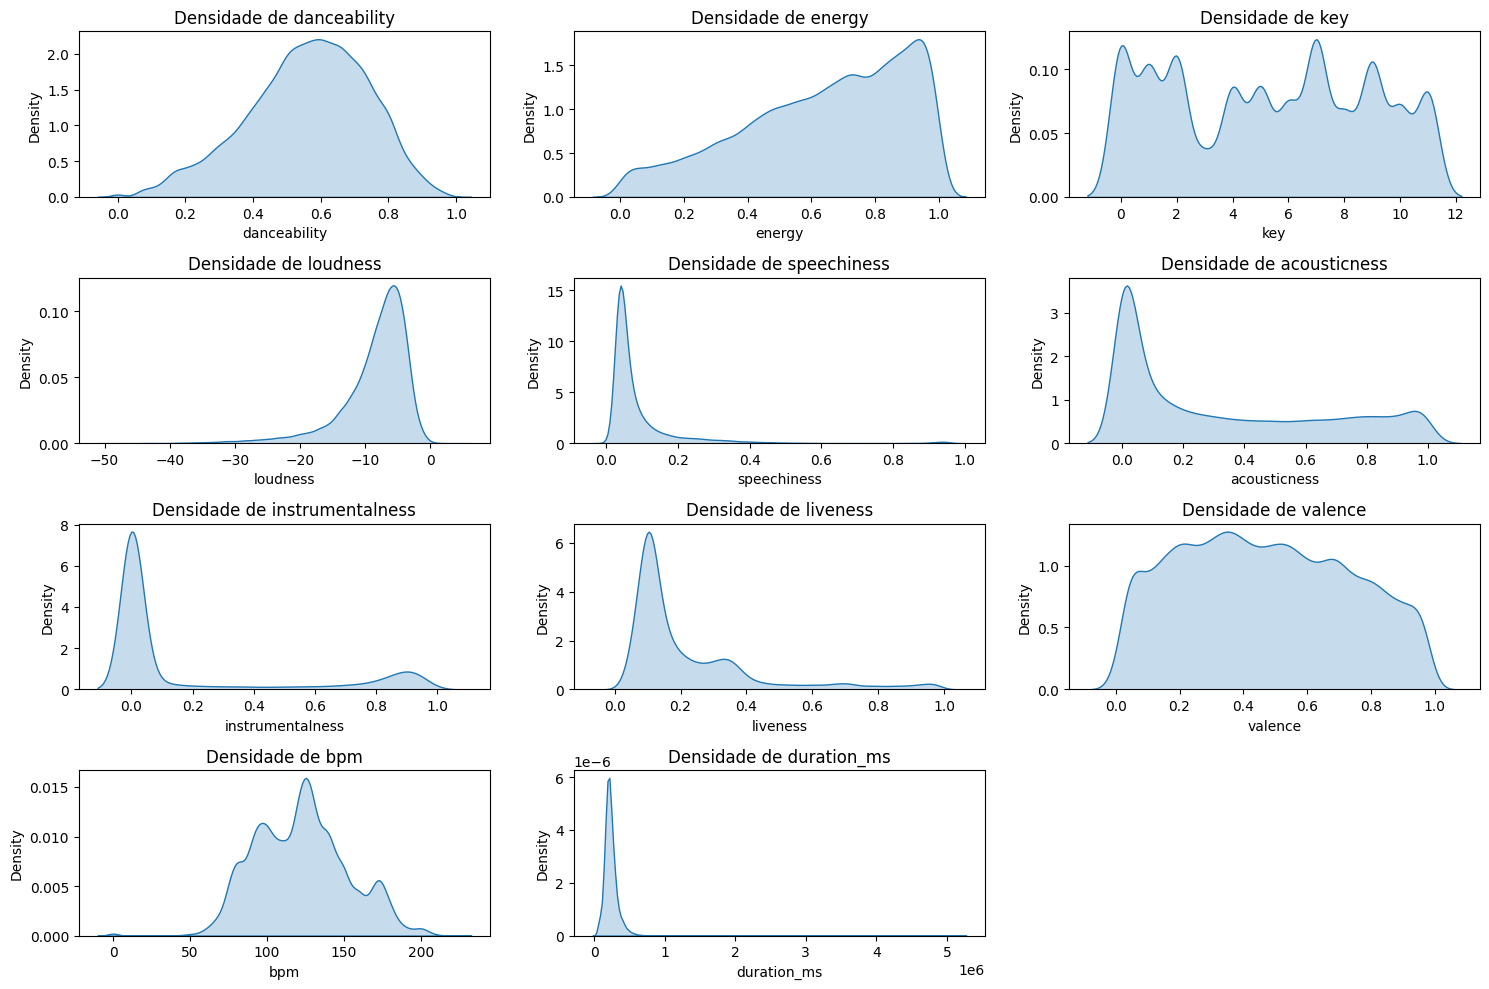

In [28]:
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(df_train_cleaned[coluna], fill=True)
    plt.title(f'Densidade de {coluna}')
plt.tight_layout()
plt.show()

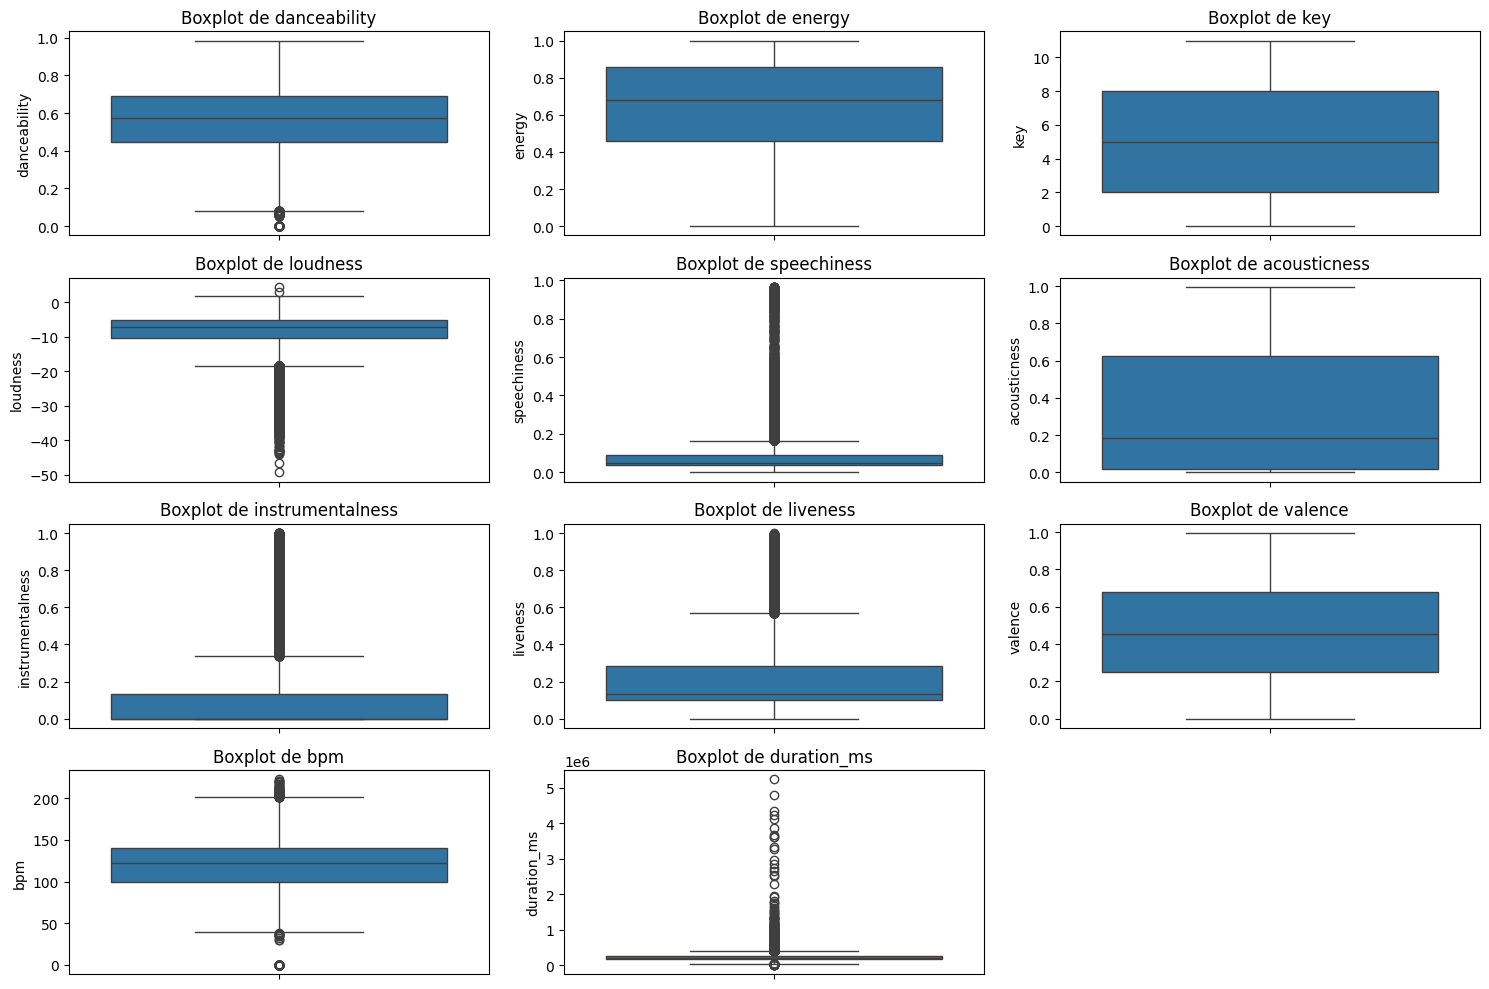

In [29]:
plt.figure(figsize=(15, 10))
for i, coluna in enumerate(colunas):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df_train_cleaned[coluna])
    plt.title(f'Boxplot de {coluna}')
plt.tight_layout()
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Após as análises de densidade e análises de *Violin Plots*, gráficos que combinam *boxplots* e gráficos de densidade, oferecendo uma visão clara da distribuição dos dados e dos outliers, não foi identificado nenhum *outlier* significativo que possa afetar negativamente o treinamento dos modelos. No entanto, é possível notar que existem algumas músicas com o bpm ("tempo") igual a 0, o que não faz sentido, deste modo, é importante substituir essas linhas. Será feito a substituição com a média do bpm.

In [30]:
# Contar quantos valores da coluna bpm são menores que 20 (um valor muito incomum para qualquer ritmo musical)
contagem_menor_20 = (df_train_cleaned['bpm'] < 20).sum()

print(f"Número de valores na coluna 'bpm' menores que 20: {contagem_menor_20}")

# Calcular a média da coluna 'bpm', ignorando os zeros
media_bpm = df_train_cleaned['bpm'].replace(0, pd.NA).mean()

# Substituir os valores iguais a 0 pela média calculada
df_train_cleaned['bpm'] = df_train_cleaned['bpm'].replace(0, media_bpm)

# Contagem depois da alteração
contagem_menor_20 = (df_train_cleaned['bpm'] < 20).sum()

print(f"Número de valores na coluna 'bpm' menores que 20: {contagem_menor_20}")

Número de valores na coluna 'bpm' menores que 20: 92
Número de valores na coluna 'bpm' menores que 20: 0


&nbsp;&nbsp;&nbsp;&nbsp; 92 músicas com bpm menor que 20 (um valor muito incomum para qualquer ritmo musical) foram alteradas para a média (sem levar em conta os valores zerados) de bpm da base.

&nbsp;&nbsp;&nbsp;&nbsp; Outro aspecto que chama atenção é a presença de música com mais de 20 minutos.

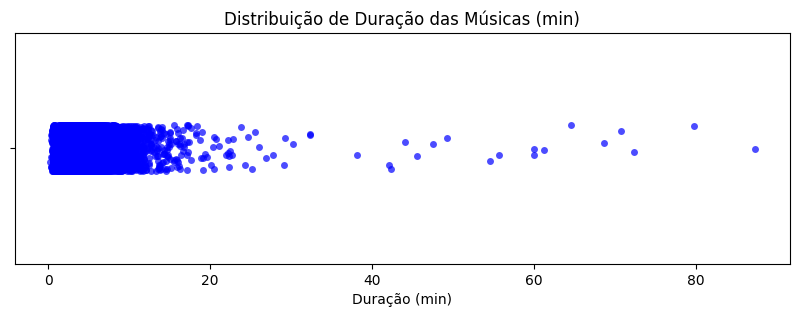

In [31]:
# Define o tamanho da figura
plt.figure(figsize=(10, 3))

# Cria o strip plot para a duração convertida em minutos
sns.stripplot(data=df_train_cleaned, x=df_train_cleaned['duration_ms'] / 60000, color='blue', alpha=0.7)

# Adiciona título e rótulos
plt.title('Distribuição de Duração das Músicas (min)')
plt.xlabel('Duração (min)')

# Exibe o gráfico
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Deste modo, é gerado um *dataframe* ordenado pela duração 

In [32]:
# Criar um novo DataFrame ordenado pela coluna duration_ms em ordem crescente
df_ordenado = df_train_cleaned.sort_values(by='duration_ms', ascending=False)

# Se você quiser visualizar as primeiras linhas do DataFrame ordenado
print("\nPrimeiras linhas do DataFrame ordenado:")
display(df_ordenado.head(10))


Primeiras linhas do DataFrame ordenado:


track_unique_id                     artists  \
11500            73617                  Tale Of Us   
19820            10984                   Timo Maas   
12914            13245                 Mark Farina   
70753            27926           Lenzman;Dan Stezo   
66566           101390                Ocean Sounds   
57018            45900                 Estas Tonne   
42933            24747            Kevin Saunderson   
17867           101940  Vacuum Cleaner White Noise   
18493           101517             Electric Dreams   
1706             65475            Anuradha Paudwal   

                                              album_name  \
11500                                 Unity (Voyage Mix)   
19820  Crossing Wires 002 - Compiled And Mixed By Tim...   
12914                                      Live In Tokyo   
70753                                   NQ State of Mind   
66566              Ocean Waves Sounds to Relax and Sleep   
57018                                    Internal Flight   
42933                            History Elevate Remixed   
17867  Colic Sweep Vacuum Cleaner White Noise (The Be...   
18493                   Electric Fan (Sound Masking Fan)   
1706                                      Gayatri Mantra   

                                              track_name  duration_ms  \
11500                           Unity (Voyage Mix) Pt. 1      5237295   
19820             Crossing Wires 002 - Continuous DJ Mix      4789026   
12914                     Live In Tokyo - Continuous Mix      4339826   
70753       NQ State of Mind, Vol. 1 - Continuous DJ Mix      4246206   
66566                                 Ocean Waves Sounds      4120258   
57018                                    Internal Flight      3876276   
42933  Kevin Saunderson History Elevate - Continuous Mix      3676760   
17867                         Vacuum Cleaner White Noise      3600120   
18493                   Electric Fan (Sound Masking Fan)      3600014   
1706                                     Om Bhurbhuwasah      3340672   

       explicit  danceability    energy  key  loudness  mode  speechiness  \
11500     False        0.6950  0.736000    5   -11.371     0       0.0374   
19820     False        0.6970  0.632000    1   -12.469     1       0.0451   
12914     False        0.8060  0.582000    1   -12.181     1       0.0874   
70753      True        0.5930  0.924000    1    -3.979     1       0.0899   
66566     False        0.0797  0.995000    1   -17.379     1       0.0612   
57018     False        0.3160  0.614000    4    -9.397     0       0.0406   
42933     False        0.7150  0.901000   10    -6.449     0       0.0497   
17867     False        0.0989  0.013400    8   -22.592     1       0.0673   
18493     False        0.0000  0.000512   11   -35.129     1       0.0000   
1706      False        0.7190  0.466000    3    -9.153     1       0.0417   

       acousticness  instrumentalness  liveness  valence         bpm  \
11500       0.00399          0.860000    0.0910  0.05090  124.001000   
19820       0.00815          0.871000    0.0998  0.15100  121.055000   
12914       0.00830          0.237000    0.3280  0.68600  128.368000   
70753       0.00369          0.022100    0.5340  0.24200  173.938000   
66566       0.93200          0.562000    0.3100  0.00001   84.788000   
57018       0.93000          0.871000    0.0775  0.19000  159.791000   
42933       0.00437          0.786000    0.0596  0.30400  130.008000   
17867       0.95800          0.871000    0.1190  0.02720   91.202000   
18493       0.94700          0.384000    0.1120  0.00000  122.400979   
1706        0.73300          0.000002    0.0973  0.81200  137.159000   

       time_signature     track_genre  popularity_target  
11500               4  minimal-techno                  0  
19820               4       breakbeat                  0  
12914               4   chicago-house                  0  
70753               4   drum-and-bass                  0  
66566      

&nbsp;&nbsp;&nbsp;&nbsp; Agora fica claro que essas músicas de longa duração na verdade são gravações de *shows*, então é importante mantê-las visando a veracidade das análises já que não são outliers causados por algum tipo de erro da base original, como é o caso de bpm = 0

# Exploração

## Análise de Variáveis Numéricas

&nbsp;&nbsp;&nbsp;&nbsp; Primeiro será feita a matriz de correlação verificando a correlatividade entre as variáveis numéricas disponíveis. A matriz de correlação permitirá identificar como os atributos acústicos e metadados estão relacionados entre si e com a variável alvo, a popularidade da música. Esta etapa é essencial para detectar padrões e possíveis relações que poderão influenciar na escolha das features mais relevantes para o modelo preditivo. A seguir, apresentamos a matriz de correlação entre as principais variáveis do conjunto de dados.

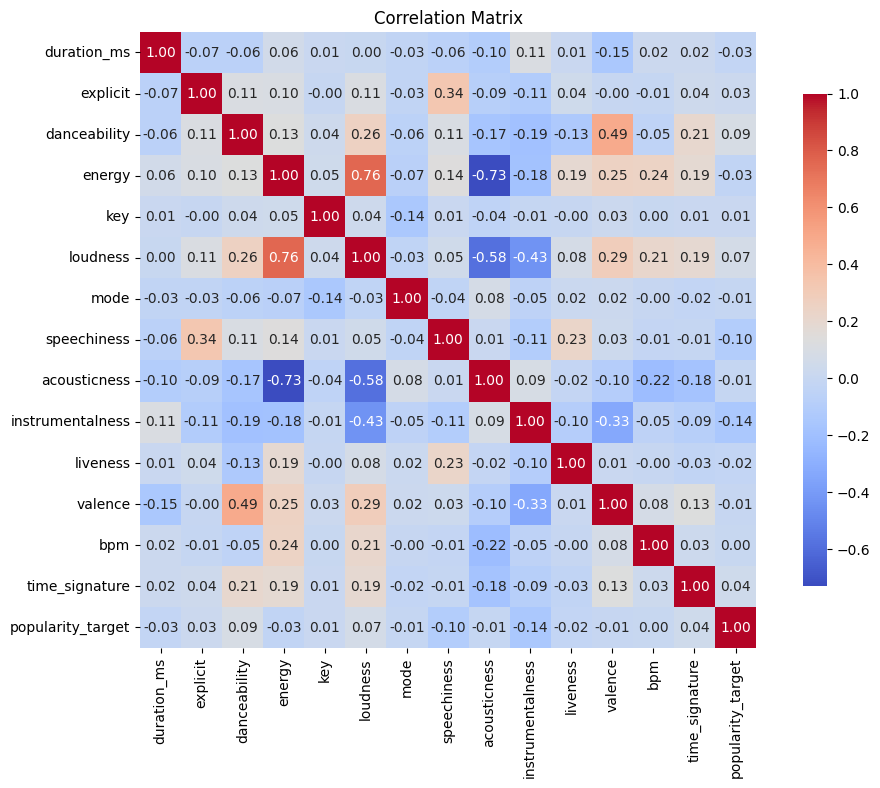

In [33]:
# Exclui track_unique_id da base porque eça é inútil para entender a popularidade uma vez que cada música tem um valor diferente apenas para identificação.
df_train_cleaned_without_id = df_train_cleaned.drop(columns=['track_unique_id'])

# Calculate the correlation matrix considering only numeric columns
correlation_matrix = df_train_cleaned_without_id.corr(numeric_only=True)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Após visualizar a matriz de correlação, é possível identificar com mais clareza os pares de variáveis que apresentam as maiores correlações entre si. Isso ajuda a compreender melhor as inter-relações dos atributos acústicos e metadados, além de destacar as variáveis que podem ter maior impacto na popularidade das músicas. A seguir, será listado os pares de variáveis com as maiores correlações, bem como as variáveis com a maior soma dos módulos de correlação e aquelas mais correlacionadas com a variável alvo, "popularity_target".

In [68]:
# Derrete a matriz de correlação, resetando o índice para facilitar a manipulação
corr_pairs = correlation_matrix.unstack().reset_index()

# Renomeia as colunas para facilitar a leitura
corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Remove pares duplicados e a diagonal (correlação de uma variável com ela mesma)
corr_pairs = corr_pairs[corr_pairs['Variable1'] != corr_pairs['Variable2']]

# Remove as duplicatas considerando que a matriz de correlação é simétrica
corr_pairs['OrderedPair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable1'], row['Variable2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='OrderedPair').drop('OrderedPair', axis=1)

# Ordena pela correlação absoluta (em ordem decrescente)
sorted_corr_pairs = corr_pairs.reindex(corr_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Imprime os pares de variáveis com a maior correlação
print("Pares de variáveis com maior correlação:")
print(sorted_corr_pairs)

# Somar o módulo das correlações de cada variável
correlation_sums = correlation_matrix.abs().sum().sort_values(ascending=False)

# Imprime a lista de variáveis com a maior soma dos módulos das correlações
print("\nVariáveis com a maior soma dos módulos das correlações:")
print(correlation_sums)

# Selecionar a coluna de correlação com 'popularity_target'
popularity_corr = correlation_matrix['popularity_target'].drop('popularity_target')

# Ordenar pela correlação absoluta
sorted_popularity_corr = popularity_corr.abs().sort_values(ascending=False)

# Criar um DataFrame para exibir os resultados
top_correlations = sorted_popularity_corr.reset_index()
top_correlations.columns = ['Variable', 'Correlation']

# Imprimir as variáveis com a maior correlação com 'popularity_target'
print("\nVariáveis com a maior módulo de correlação com 'popularity_target':")
print(top_correlations)


Pares de variáveis com maior correlação:
        Variable1         Variable2  Correlation
50         energy          loudness     0.761048
53         energy      acousticness    -0.729433
83       loudness      acousticness    -0.582815
41   danceability           valence     0.491165
84       loudness  instrumentalness    -0.432892
..            ...               ...          ...
19       explicit               key    -0.003009
5     duration_ms          loudness     0.002785
26       explicit           valence    -0.001851
162      liveness               bpm    -0.001047
102          mode               bpm    -0.000364

[105 rows x 3 columns]

Variáveis com a maior soma dos módulos das correlações:
energy               4.132924
loudness             4.123436
acousticness         3.416018
danceability         3.092816
instrumentalness     2.990858
valence              2.923395
speechiness          2.257672
time_signature       2.189504
explicit             2.079271
bpm                 

&nbsp;&nbsp;&nbsp;&nbsp; A análise de correlação revelou algumas relações importantes entre as variáveis acústicas. As variáveis "energy" e "loudness" apresentaram a correlação positiva mais forte (0,76), indicando que músicas mais energéticas tendem a ser mais altas. Já a "acousticness" mostrou uma correlação negativa significativa tanto com "energy" (-0,73) quanto com "loudness" (-0,58), sugerindo que músicas acústicas tendem a ser menos energéticas e mais silenciosas. Embora a correlação direta entre as variáveis e a popularidade (popularity_target) seja relativamente fraca, as variáveis com maior impacto incluem "instrumentalness" (0,14), "speechiness" (0,10) e "danceability" (0,09), sugerindo uma leve influência dessas características na popularidade das músicas.

&nbsp;&nbsp;&nbsp;&nbsp; Abaixo será gerado o *pairplot*, gráfico que oferece uma visão detalhada de como musícas populares e não populares distribuem-se entre as relações de cada coluna numérica da base.

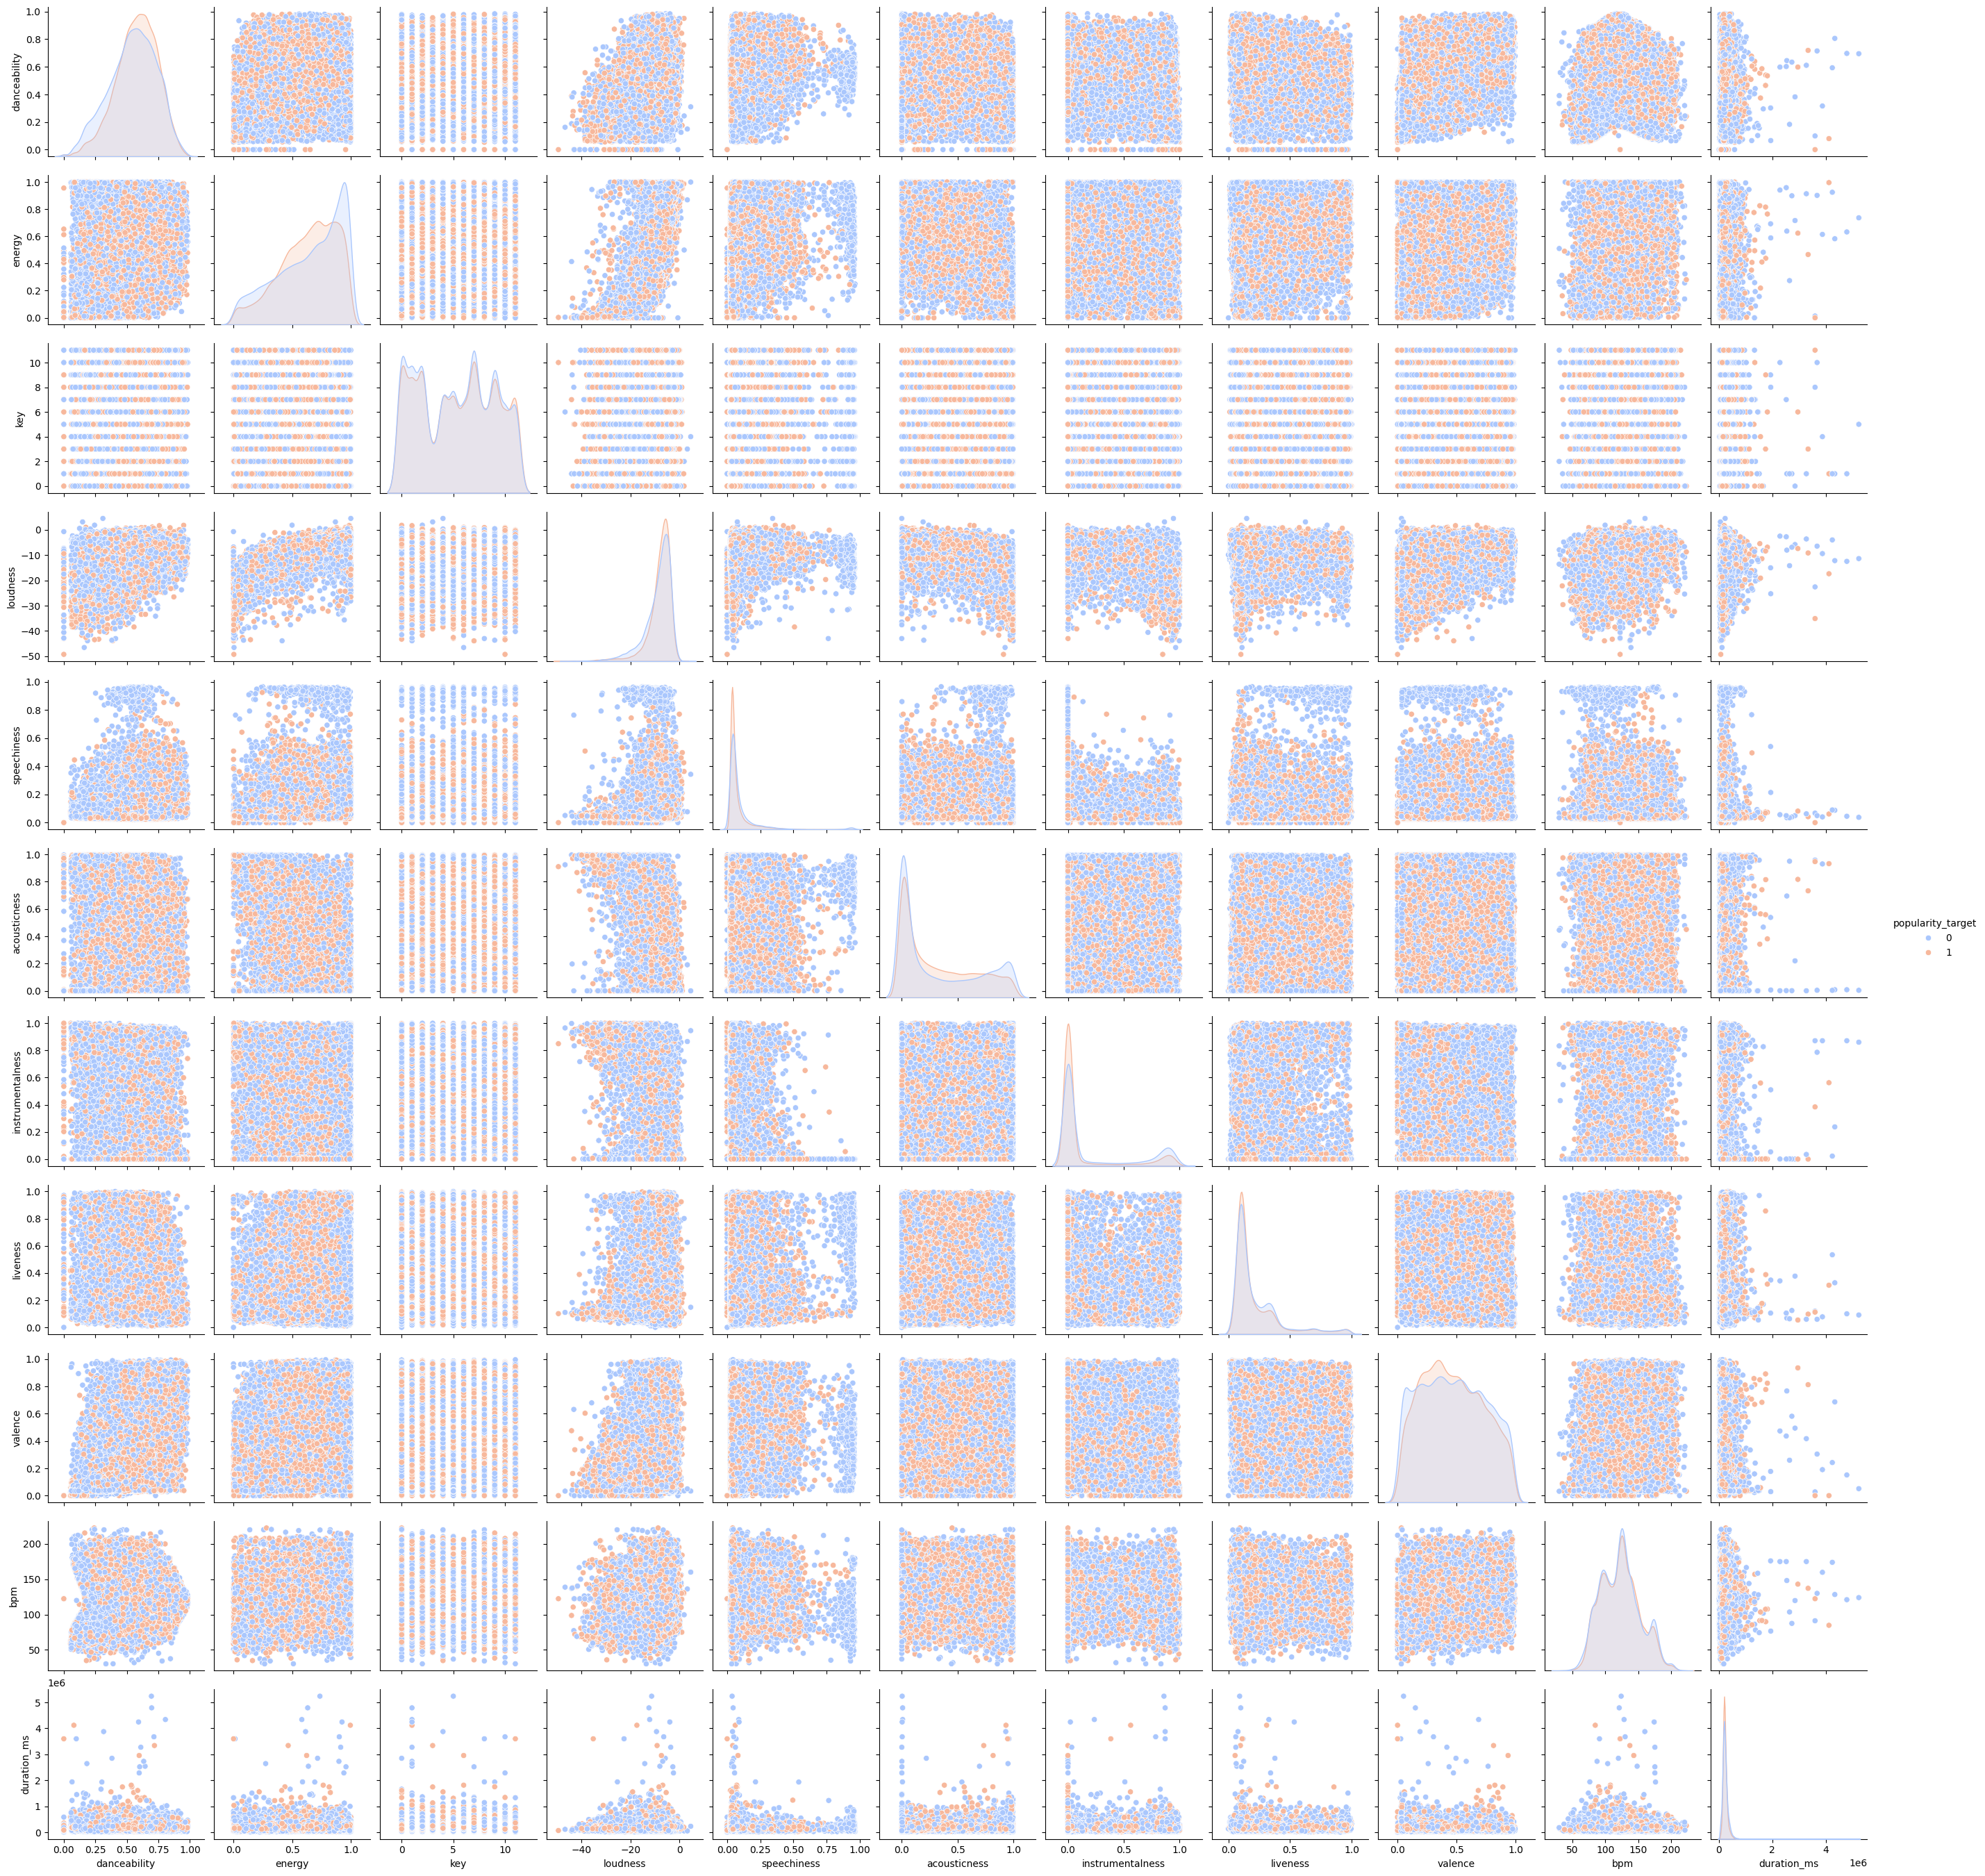

In [35]:
# Criar o pairplot para as colunas selecionadas
sns.pairplot(df_train_cleaned_without_id[colunas + ['popularity_target']], 
             hue='popularity_target', 
             diag_kind='kde', 
             palette='coolwarm')

# Exibir o gráfico
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; No geral, é possível notar que as músicas se distribuem-se homogeneamente entre as relações das *features*, mas algumas relações chamam atenção, como é o caso de *acousticness* e *duration_ms* que, músicas com pouco *acousticness* e muita *duration_ms* são todas não populares. Outra inferência considerável é que em todas as relações de "spechiness", quando seus valores são altos (próximos a 1), as músicas não são populares.

&nbsp;&nbsp;&nbsp;&nbsp; Agora que já foi feita uma análise da distribuição de popularideda entre diferentes relações de colunas, é adequado analisar como fica a distribuição de músicas populares e não populares em cada coluna unicamente. Para isso, é interessante analisar o *violin plot* para cada coluna. Este gráfico combina características do *box plot* e uma estimativa de densidade de kernel, apresentando a forma da distribuição dos dados em cada categoria.

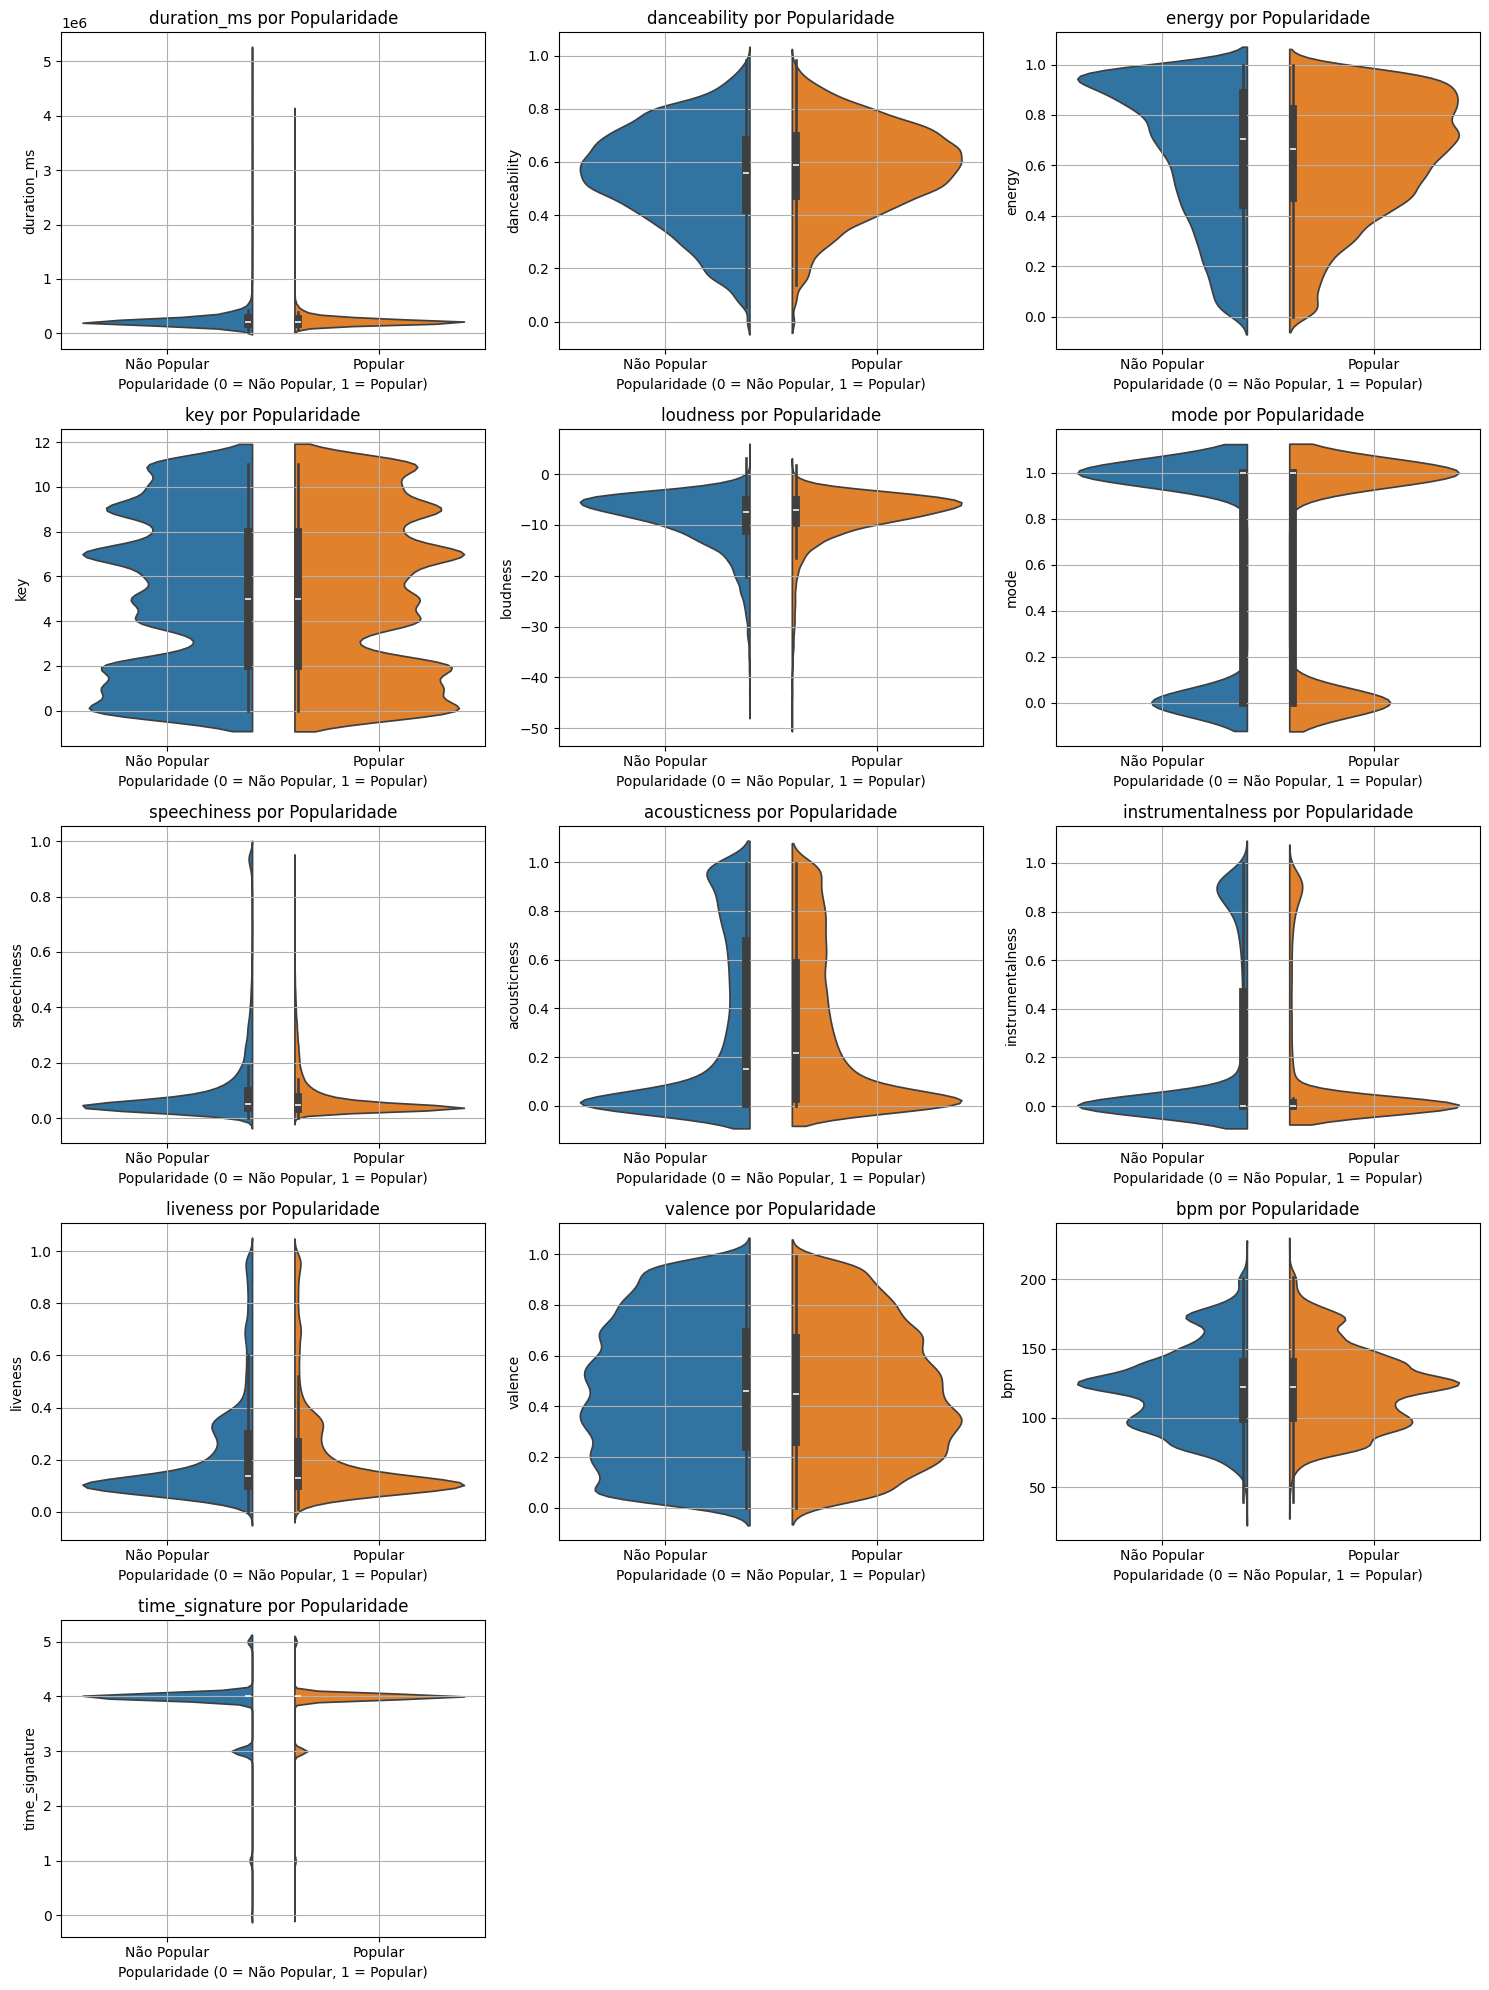

In [80]:
# Obtenha as colunas numéricas, excluindo as colunas 'popularity_target' e 'track_unique_id'
numeric_cols = df_train_cleaned.select_dtypes(include='number').columns.tolist()
numeric_cols.remove('popularity_target')
numeric_cols.remove('track_unique_id')  # Remover a coluna track_unique_id

# Defina o número de colunas para os subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcula o número de linhas necessárias

# Crie uma figura e subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Facilita o acesso aos eixos

# Crie gráficos de violino para cada coluna numérica
for i, col in enumerate(numeric_cols):
    sns.violinplot(x='popularity_target', y=col, data=df_train_cleaned, hue='popularity_target', palette=['#1f77b4', '#ff7f0e'], split=True, ax=axes[i], legend=False)
    axes[i].set_title(f'{col} por Popularidade')
    axes[i].set_xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
    axes[i].set_ylabel(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Não Popular', 'Popular'])
    axes[i].grid(True)

# Remove eixos não utilizados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

&nbsp;&nbsp;&nbsp;&nbsp; Assim como no supracitado *pairplot*, os *violins plot* também indicam uma hegemonia na distribuição dos dados, no entanto, há algumas *features* que chamam atenção. Alto valores em "energy" são importantes para determinar a popularidade de uma música, no entanto, com cautela, pois quando "energy" se aproxima de 1, a popularidade cai. "acousticness" próximos a 1 posuem mais ocorrências de músicas não populares que populares.

**Variáveis Binárias**

Agora, será feita a análise das variáveis binárias "explicit" e "mode", verificando como elas se distribuem entre músicas populares e não populares. Para isso, é calculado a proporção de músicas populares e não populares dentro de cada categoria dessas variáveis, além de visualizar graficamente essas distribuições. Esse processo permitirá avaliar se características como a presença de conteúdo explícito ou o modo musical influenciam diretamente na popularidade das faixas.

<Figure size 1200x600 with 0 Axes>

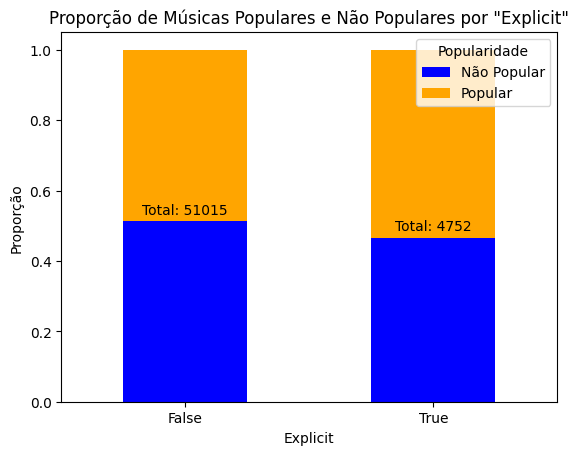

<Figure size 1200x600 with 0 Axes>

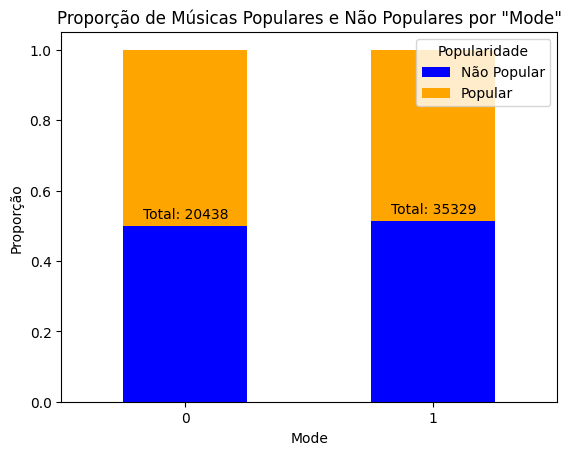

In [69]:
# Calcular a contagem de músicas populares e não populares para "explicit"
explicit_counts = df_train_cleaned.groupby(['explicit', 'popularity_target']).size().unstack(fill_value=0)

# Calcular a proporção
explicit_proportions = explicit_counts.div(explicit_counts.sum(axis=1), axis=0)

# Calcular a contagem total de músicas em cada categoria
explicit_counts['total'] = explicit_counts.sum(axis=1)

# Repetir o processo para "mode"
mode_counts = df_train_cleaned.groupby(['mode', 'popularity_target']).size().unstack(fill_value=0)
mode_proportions = mode_counts.div(mode_counts.sum(axis=1), axis=0)
mode_counts['total'] = mode_counts.sum(axis=1)

# Gráfico para "explicit"
plt.figure(figsize=(12, 6))
explicit_proportions.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Proporção de Músicas Populares e Não Populares por "Explicit"')
plt.xlabel('Explicit')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Popularidade', labels=['Não Popular', 'Popular'])

# Adicionando contagem total de músicas em cada barra
for i in range(len(explicit_counts)):
    plt.text(i, explicit_proportions.iloc[i, 0] + 0.02, f"Total: {explicit_counts.iloc[i, 2]}", ha='center')

plt.show()

# Gráfico para "mode"
plt.figure(figsize=(12, 6))
mode_proportions.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Proporção de Músicas Populares e Não Populares por "Mode"')
plt.xlabel('Mode')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Popularidade', labels=['Não Popular', 'Popular'])

# Adicionando contagem total de músicas em cada barra
for i in range(len(mode_counts)):
    plt.text(i, mode_proportions.iloc[i, 0] + 0.02, f"Total: {mode_counts.iloc[i, 2]}", ha='center')

plt.show()

## Análises de Variáveis Categóricas

&nbsp;&nbsp;&nbsp;&nbsp; Nesta etapa de análise das variáveis categóricas, será começada pela investigação da distribuição de popularidade entre os artistas com maior presença no conjunto de dados. Inicialmente, será identificado os 10 artistas mais frequentes com a quantidade de músicas populares e não populares para cada um deles, utilizando gráficos de barras empilhadas para facilitar a visualização. Além disso, será criado um *ranking* dos artistas com mais músicas populares, destacando também a proporção de faixas não populares.

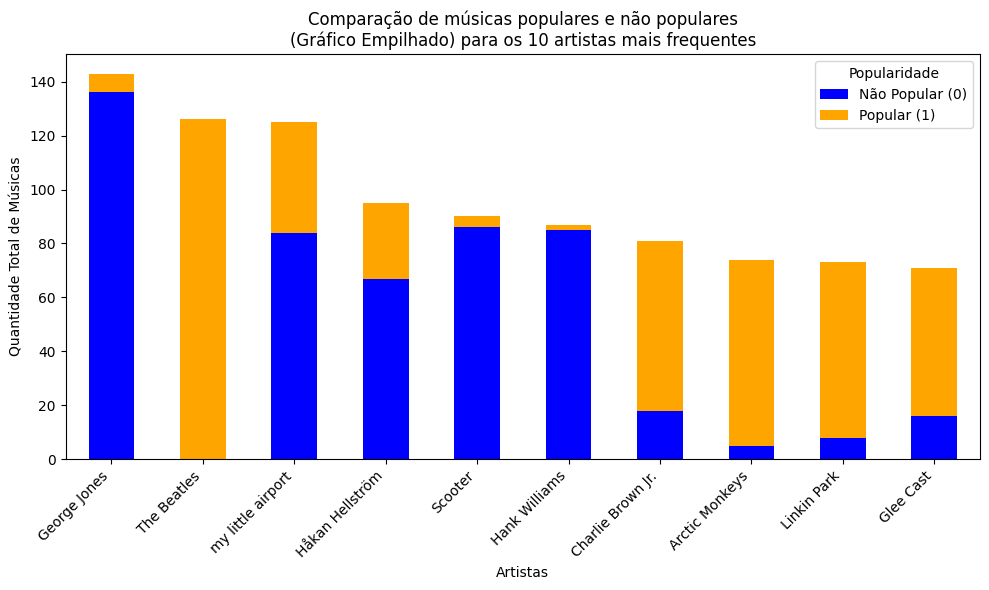

Ranking dos artistas mais populares e a quantidade de músicas populares e não populares:


artists  num_nao_populares  num_populares  total_musicas
0              The Beatles                  0            126            252
1           Arctic Monkeys                  5             69            143
2              Linkin Park                  8             65            138
3        Charlie Brown Jr.                 18             63            144
4                      BTS                  0             62            124
5                CoComelon                  1             62            125
6                 Jay Chou                  0             62            124
7                Glee Cast                 16             55            126
8               Pink Floyd                  0             53            106
9               Eason Chan                  2             48             98
10      Henrique & Juliano                  0             47             94
11               Rammstein                  0             45             90
12           Elvis Presley                  8             43             94
13        Hillsong Worship                  4             42             88
14  Os Barões Da Pisadinha                  0             42             84

In [37]:
# 1. Contar a frequência dos artistas
frequencia_artistas = df_train_cleaned['artists'].value_counts()

# 2. Converter para DataFrame
df_frequencia_artistas = frequencia_artistas.reset_index()
df_frequencia_artistas.columns = ['artists', 'frequency']  # Renomear as colunas

# 3. Ordenar o DataFrame pela frequência em ordem decrescente
df_frequencia_artistas = df_frequencia_artistas.sort_values(by='frequency', ascending=False)

# 4. Filtrar os 10 artistas mais frequentes
top10_artistas = df_frequencia_artistas.head(10)['artists']

# 5. Filtrar o DataFrame original para pegar as músicas desses 10 artistas
df_top10 = df_train_cleaned[df_train_cleaned['artists'].isin(top10_artistas)]

# 6. Agrupar por artista e popularidade, contando a quantidade de músicas populares e não populares
df_popularity_comparison = df_top10.groupby(['artists', 'popularity_target']).size().unstack(fill_value=0)

# 7. Ordenar os artistas pela frequência no dataset original (para manter a ordem correta)
df_popularity_comparison = df_popularity_comparison.loc[top10_artistas]

# 8. Gerar o gráfico de barras empilhadas
ax = df_popularity_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])

# Adicionar títulos e legendas
plt.title('Comparação de músicas populares e não populares\n(Gráfico Empilhado) para os 10 artistas mais frequentes')
plt.xlabel('Artistas')
plt.ylabel('Quantidade Total de Músicas')
plt.xticks(rotation=45, ha='right')
plt.legend(['Não Popular (0)', 'Popular (1)'], title='Popularidade')
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 9. Criar o DataFrame com os artistas, quantidade de músicas populares e não populares
df_popularity_artists = df_train_cleaned.groupby(['artists', 'popularity_target']).size().unstack(fill_value=0).reset_index()

# 10. Renomear as colunas
df_popularity_artists.columns = ['artists', 'num_nao_populares', 'num_populares']

# 11. Calcular o total de músicas de cada artista
df_popularity_artists['total_musicas'] = df_popularity_artists['num_populares'] + df_popularity_artists['num_nao_populares'] + df_popularity_artists['num_populares']

# 12. Ordenar o DataFrame pela quantidade de músicas populares em ordem decrescente
df_popularity_artists_sorted = df_popularity_artists.sort_values(by='num_populares', ascending=False)

# 13. Exibir o ranking dos artistas mais populares com a quantidade de músicas populares e não populares
print("Ranking dos artistas mais populares e a quantidade de músicas populares e não populares:")
df_popularity_artists_sorted.reset_index(drop=True, inplace=True)
display(df_popularity_artists_sorted.head(15))

&nbsp;&nbsp;&nbsp;&nbsp; Inferências

&nbsp;&nbsp;&nbsp;&nbsp; Nesta análise, será explorada a frequência de músicas associadas aos álbuns mais recorrentes no conjunto de dados. Primeiro, um gráfico com os 10 álbuns com o maior número de faixas, comparando a quantidade de músicas populares e não populares para cada um deles através de um gráfico de barras empilhadas. Depois, um *ranking* dos 15 álbuns com mais músicas populares, incluindo o nome do artista e o número de músicas não populares, para melhor entender a distribuição de popularidade por álbum.

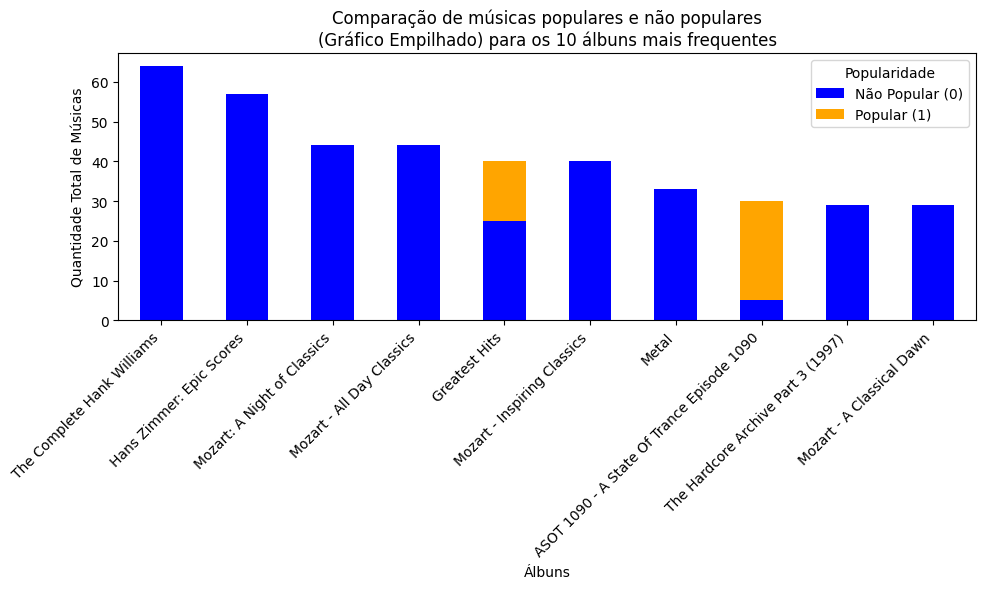

Ranking dos 15 álbuns com mais músicas populares, incluindo artista e quantidade de músicas não populares:


album_name                artists  \
0                                      1 (Remastered)            The Beatles   
1   Meereswellen zum Schlafen: Weißes Rauschen für...     Weißes Rauschen HD   
2                              Sleep Anime Lofi Beats                   Kato   
3                         Nursery Rhymes by CoComelon              CoComelon   
4           Alles aus Liebe: 40 Jahre Die Toten Hosen        Die Toten Hosen   
5                             Abbey Road (Remastered)            The Beatles   
6                         Return of the Dream Canteen  Red Hot Chili Peppers   
7                                         Pink Season               Pink Guy   
8                                      Raiz (Ao Vivo)           Lauana Prado   
9                                            The Wall             Pink Floyd   
10                                   Un Verano Sin Ti              Bad Bunny   
11                      Söz & Müzik: Tan Taşçı (Live)              Tan Taşçı   
12                                  Imunidade Musical      Charlie Brown Jr.   
13                                 Acústico (Ao Vivo)      Charlie Brown Jr.   
14                                           SABINA之淚      my little airport   

    num_populares  num_nao_populares  
0              20                  0  
1              18                  0  
2              18                  0  
3              17                  0  
4              15                  1  
5              14                  0  
6              14                  0  
7              13                  0  
8              13                  0  
9              12                  0  
10             12                  0  
11             12                  0  
12             11                  2  
13             11                  0  
14             11                  0

In [38]:
# 1. Contar a frequência dos álbuns
frequencia_albuns = df_train_cleaned['album_name'].value_counts()

# 2. Converter para DataFrame
df_frequencia_albuns = frequencia_albuns.reset_index()
df_frequencia_albuns.columns = ['album_name', 'frequency']  # Renomear as colunas

# 3. Ordenar o DataFrame pela frequência em ordem decrescente
df_frequencia_albuns = df_frequencia_albuns.sort_values(by='frequency', ascending=False)

# 4. Filtrar os 10 álbuns mais frequentes
top10_albuns = df_frequencia_albuns.head(10)['album_name']

# 5. Filtrar o DataFrame original para pegar as músicas desses 10 álbuns
df_top10_albuns = df_train_cleaned[df_train_cleaned['album_name'].isin(top10_albuns)]

# 6. Agrupar por álbum e popularidade, contando a quantidade de músicas populares e não populares
df_popularity_comparison_albuns = df_top10_albuns.groupby(['album_name', 'popularity_target']).size().unstack(fill_value=0)

# 7. Ordenar os álbuns pela frequência no dataset original (para manter a ordem correta)
df_popularity_comparison_albuns = df_popularity_comparison_albuns.loc[top10_albuns]

# 8. Gerar o gráfico de barras empilhadas
ax = df_popularity_comparison_albuns.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])

# Adicionar títulos e legendas
plt.title('Comparação de músicas populares e não populares\n(Gráfico Empilhado) para os 10 álbuns mais frequentes')
plt.xlabel('Álbuns')
plt.ylabel('Quantidade Total de Músicas')
plt.xticks(rotation=45, ha='right')
plt.legend(['Não Popular (0)', 'Popular (1)'], title='Popularidade')
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 1. Contar as músicas populares (popularity_target = 1) e não populares (popularity_target = 0) por álbum
df_album_popularidade = df_train_cleaned.groupby(['album_name', 'artists', 'popularity_target']).size().unstack(fill_value=0)

# 2. Criar uma nova coluna com a quantidade de músicas populares e não populares
df_album_popularidade.columns = ['num_nao_populares', 'num_populares']

# 3. Ordenar os álbuns com base na quantidade de músicas populares em ordem decrescente
df_album_popularidade_sorted = df_album_popularidade.sort_values(by='num_populares', ascending=False)

# 4. Selecionar os 15 álbuns com mais músicas populares
top15_albuns_populares = df_album_popularidade_sorted.head(15).reset_index()

# 5. Exibir o ranking dos 15 álbuns mais populares, incluindo o artista e a quantidade de músicas não populares
print("Ranking dos 15 álbuns com mais músicas populares, incluindo artista e quantidade de músicas não populares:")
display(top15_albuns_populares[['album_name', 'artists', 'num_populares', 'num_nao_populares']])

&nbsp;&nbsp;&nbsp;&nbsp; Inferências

&nbsp;&nbsp;&nbsp;&nbsp; Por último, é feita exploração da relação entre os gêneros musicais mais recorrentes e a popularidade das músicas associadas a eles. Inicialmente, ocorre a identificação dos 10 gêneros mais frequentes no conjunto de dados e examinamos a proporção de músicas populares e não populares para cada um, representando esses dados em um gráfico de barras empilhadas. Em seguida, será apresentado um *ranking* dos gêneros com mais músicas populares e não populares, destacando como certos estilos musicais se relacionam com a popularidade dentro do *dataset*.

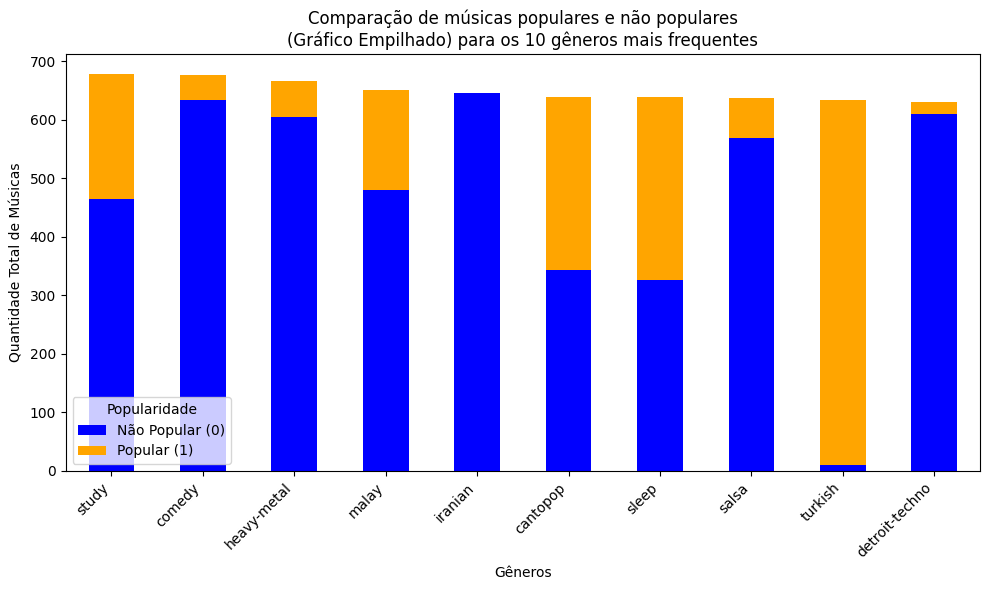

Ranking dos gêneros mais populares e a quantidade de músicas populares e não populares:


track_genre  num_nao_populares  num_populares  total_musicas
112      turkish                 11            623            634
35         forro                  0            614            614
97     sertanejo                  1            601            602
40        gospel                  2            567            569
77        pagode                  5            558            563
81      pop-film                 22            547            569
65         k-pop                  9            525            534
74           mpb                 17            519            536
5          anime                 71            496            567
70      mandopop                135            489            624
96         samba                 60            486            546
94           sad                 25            486            511
113  world-music                144            480            624
55        indian                 22            479            501
15         chill                 17            464            481

In [39]:
# 1. Contar a frequência dos gêneros
frequencia_generos = df_train_cleaned['track_genre'].value_counts()

# 2. Converter para DataFrame
df_frequencia_generos = frequencia_generos.reset_index()
df_frequencia_generos.columns = ['track_genre', 'frequency']  # Renomear as colunas

# 3. Ordenar o DataFrame pela frequência em ordem decrescente
df_frequencia_generos = df_frequencia_generos.sort_values(by='frequency', ascending=False)

# 4. Filtrar os 10 gêneros mais frequentes
top10_generos = df_frequencia_generos.head(10)['track_genre']

# 5. Filtrar o DataFrame original para pegar as músicas desses 10 gêneros
df_top10_generos = df_train_cleaned[df_train_cleaned['track_genre'].isin(top10_generos)]

# 6. Agrupar por gênero e popularidade, contando a quantidade de músicas populares e não populares
df_popularity_comparison_generos = df_top10_generos.groupby(['track_genre', 'popularity_target']).size().unstack(fill_value=0)

# 7. Ordenar os gêneros pela frequência no dataset original (para manter a ordem correta)
df_popularity_comparison_generos = df_popularity_comparison_generos.loc[top10_generos]

# 8. Gerar o gráfico de barras empilhadas
ax = df_popularity_comparison_generos.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])

# Adicionar títulos e legendas
plt.title('Comparação de músicas populares e não populares\n(Gráfico Empilhado) para os 10 gêneros mais frequentes')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade Total de Músicas')
plt.xticks(rotation=45, ha='right')
plt.legend(['Não Popular (0)', 'Popular (1)'], title='Popularidade')
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 9. Criar o DataFrame com os gêneros, quantidade de músicas populares e não populares
df_popularity_genres = df_train_cleaned.groupby(['track_genre', 'popularity_target']).size().unstack(fill_value=0).reset_index()

# 10. Renomear as colunas
df_popularity_genres.columns = ['track_genre', 'num_nao_populares', 'num_populares']

# 11. Calcular o total de músicas de cada gênero
df_popularity_genres['total_musicas'] = df_popularity_genres['num_nao_populares'] + df_popularity_genres['num_populares']

# 12. Ordenar o DataFrame pela quantidade de músicas populares em ordem decrescente
df_popularity_genres_sorted = df_popularity_genres.sort_values(by='num_populares', ascending=False)

# 13. Exibir o ranking dos gêneros mais populares com a quantidade de músicas populares e não populares
print("Ranking dos gêneros mais populares e a quantidade de músicas populares e não populares:")
display(df_popularity_genres_sorted.head(15))


&nbsp;&nbsp;&nbsp;&nbsp; Inferências

# Hipóteses

# Pré-processamento

## Codificação

&nbsp;&nbsp;&nbsp;&nbsp; Primeiro é feita a transformação das colunas categóricas em números inteiros

In [40]:
# # Criar um objeto LabelEncoder
# label_encoder = LabelEncoder()

# # Identificar colunas categóricas
# colunas_categoricas = ['artists', 'album_name', 'track_name', 'track_genre']

# # Aplicar Label Encoding em cada coluna categórica
# for coluna in colunas_categoricas:
#     df_train_cleaned[coluna] = label_encoder.fit_transform(df_train_cleaned[coluna])
    
# df_train_cleaned.info()
# display_statistics(df_train_cleaned)

&nbsp;&nbsp;&nbsp;&nbsp; Também é necessário transformar a coluna booleana ("explicit") em uma coluna numérica.

In [41]:
# # Transformar a coluna 'explicit' em 0 e 1
# df_train_cleaned['explicit'] = df_train_cleaned['explicit'].astype(int)

# df_train_cleaned.info()

&nbsp;&nbsp;&nbsp;&nbsp; Acima é possível ver como ficou a nova estrutura de dados

## Escalonamento

&nbsp;&nbsp;&nbsp;&nbsp; Para que os algoritmos consigam interpretar e calcular os dados de um modo que eles não tenham pesos diferentes, é necessário colocá-los na mesma escala. Aqui será utilizado a técnica MinMaxScaler disponibilizada pela biblioteca Scikit-Learn que deixa os valor máximo de uma coluna igual a 1 e o valor mínimo igual a 0, e o resto dos valores na mesma escala de antes, só que agora entre o intervalo entre 1 e 0.

In [42]:
# # Estatísticas antes do escalonamento
# display_statistics(df_train_cleaned)

# # Instanciar o MinMaxScaler
# scaler = MinMaxScaler()

# # Selecionar colunas para escalar (todas exceto 'track_unique_id', 'popularity_target', 'mode', 'explicit', 'liveness', 'energy' e 'instrumentalness', pois já se encontram na escala 0-1)
# columns_to_scale = df_train_cleaned.columns.difference(['track_unique_id', 'popularity_target', 'mode', 'explicit', 'liveness', 'energy', 'instrumentalness'])

# # Aplicar o scaler apenas nas colunas selecionadas
# df_scaled_values = scaler.fit_transform(df_train_cleaned[columns_to_scale])

# # Criar um novo DataFrame com os valores escalados
# df_scaled = pd.DataFrame(df_scaled_values, columns=columns_to_scale)

# # Reintegrar as colunas não escaladas
# df_scaled['track_unique_id'] = df_train_cleaned['track_unique_id'].values
# df_scaled['popularity_target'] = df_train_cleaned['popularity_target'].values
# df_scaled['mode'] = df_train_cleaned['mode'].values
# df_scaled['explicit'] = df_train_cleaned['explicit'].values
# df_scaled['liveness'] = df_train_cleaned['liveness'].values
# df_scaled['energy'] = df_train_cleaned['energy'].values
# df_scaled['instrumentalness'] = df_train_cleaned['instrumentalness'].values

# # Estatísticas depois do escalonamento
# display_statistics(df_scaled)

&nbsp;&nbsp;&nbsp;&nbsp; Na saída acima, é possível comparar os valores mínimos e máximos antes e dpois do escalonamento e notar seu o efeito.

# Treinamento do Modelo

## Seleção de *Features*

## Escolha do Modelo

## *Finetuning* de Hiperparâmetros

## Treinamento

## Avaliação

# Conclusão

&nbsp;&nbsp;&nbsp;&nbsp; Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec elementum porta urna. Donec sagittis, ligula et feugiat mattis, lacus nisi efficitur lorem, eget imperdiet elit sem ut justo.  